In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing



In [3]:
df = pd.read_csv('Steel_industry_data.csv')

*Мощность 2 7 и 3 у трех категориальных признаков (WeekStatus, Day_of_week и Load_type), замаппим на числа*

In [4]:
df.max()

date                                    31/12/2018 23:45
Usage_kWh                                         157.18
Lagging_Current_Reactive.Power_kVarh               96.91
Leading_Current_Reactive_Power_kVarh               27.76
CO2(tCO2)                                           0.07
Lagging_Current_Power_Factor                       100.0
Leading_Current_Power_Factor                       100.0
NSM                                                85500
WeekStatus                                       Weekend
Day_of_week                                    Wednesday
Load_Type                                    Medium_Load
dtype: object

In [5]:
le = preprocessing.LabelEncoder()
for column_name in df.columns:
    if column_name == 'WeekStatus' or column_name == 'Day_of_week' or column_name == 'Load_Type':
        df[column_name] = le.fit_transform(df[column_name])

/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/va

In [6]:
X = df.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
y = df.iloc[:, 0:2]

# RMLP Implementation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
24510,13/09/2018 07:45,5.26,0.00,0.00,56.48,100.00,27900,0,4,0
11355,29/04/2018 07:00,3.74,0.00,0.00,57.52,100.00,25200,1,3,0
32539,05/12/2018 23:00,4.21,0.00,0.00,68.88,100.00,82800,0,6,1
18663,14/07/2018 10:00,1.66,0.29,0.02,99.91,100.00,36000,1,2,2
33094,11/12/2018 17:45,0.00,3.89,0.01,100.00,99.27,63900,0,5,1
...,...,...,...,...,...,...,...,...,...,...
16850,25/06/2018 12:45,0.00,25.27,0.00,100.00,22.22,45900,0,1,2
6265,07/03/2018 06:30,4.57,0.00,0.00,63.03,100.00,23400,0,6,0
11284,28/04/2018 13:15,0.14,14.33,0.01,99.99,68.76,47700,1,2,1
860,09/01/2018 23:15,4.32,0.00,0.00,73.19,100.00,83700,0,5,0


In [9]:
#Отсортируемся по времени
X_train = X_train.sort_values(by='date')
X_test = X_test.sort_values(by='date')
y_train = y_train.sort_values(by='date')
y_test = y_test.sort_values(by='date')
#Избавимся от времени
X_train = X_train.loc[:, X_train.columns != 'date']
X_test = X_test.loc[:, X_test.columns != 'date']
y_train = y_train.loc[:, y_train.columns != 'date']
y_test = y_test.loc[:, y_test.columns != 'date']

In [10]:
from sklearn.preprocessing import MinMaxScaler

# Создание объекта MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)


/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-network/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/khumachbayramova/anaconda3/envs/recurrent-neural-netw

In [25]:
rng = np.random.default_rng(51)


def tanh(x):
    return np.tanh(x)


def dtanh(x):
    return 1 - np.square(tanh(x))


def mse(y_pred, y, batch_size):
     n = y_pred.shape[0]
     squared_batched = []
     for i in range(0, n , batch_size):
         batch_y_pred = y_pred[i:i + batch_size]
         batch_y = y[i:i + batch_size]
         squared_batched.append(0.5 * np.sum(np.square(batch_y_pred - batch_y)))
     err = np.mean(squared_batched)
     return err

def r2(y_pred, y, batch_size):
     n = y_pred.shape[0]
     chisl = 0
     znamen = np.sum((y - np.mean(y))**2) 
     for i in range(0, n , batch_size):
         batch_y_pred = y_pred[i:i + batch_size]
         batch_y = y[i:i + batch_size]
         chisl += np.sum((batch_y - batch_y_pred)**2) 
         
     return 1 - chisl/znamen


def dmse(y_pred, y):
    n = y.shape[0]
    return (2 / n) * (y_pred - y)

In [28]:
class RMLP:
    def __init__(self, architecture, batch_size, learning_rate):
        self.depth = len(architecture) - 1
        self.arch = architecture
        self.lr = learning_rate
        self.W = self._init_weights(architecture)
        self.b = self._init_biases(architecture)
        self.y_pred = np.array([])
        self.batch_size = batch_size

        # self.z = [None] * (self.depth + 1)
        # self.y = [None] * (self.depth + 1)
        # functions
        self.activation_fn = tanh
        self.activation_dfn = dtanh
        self.loss_fn = mse
        # self.loss_dfn = dme


    #веса генерятся и для рекуррентных связей. Веса для рекурретных связей - на нечетных позициях
    def _init_weights(self, arch):
        net_in = arch[0]
        net_out = arch[-1]
        limit = np.sqrt(6. / (net_in + net_out))
        results = []
        for i in range(self.depth):
            result = rng.uniform(-limit, limit + 1e-5, size=(arch[i + 1], arch[i]))
            results.append(result)
            result = rng.uniform(-limit, limit + 1e-5, size=(arch[i + 1],))
            results.append(result)

        return results

    def _init_biases(self, arch):
        return [rng.random((arch[i + 1],)) * 2 - 1 for i in range(self.depth)]

    def _compute_loss(self, X, y):
        y_pred = np.array(self.predict(X))
        y = np.array(y)
        y = y.reshape(y.shape[0])
        return self.loss_fn(y_pred, y, self.batch_size)

    def _feedforward(self, batch_X):
        batch_size = batch_X.shape[0]
        self.y_pred = np.array([])
        # self.y_per_layer = [batch_size] * ([None] * (self.depth + 1))
        # self.y_per_layer = [[[[0]] * i for i in range(self.depth+1)] * j for j in range(batch_size)]
        self.y_per_layer = [([np.zeros(self.arch[i]) for i in range(self.depth + 1)]) for _ in range(batch_size)]
        self.z_per_layer = [([np.zeros(self.arch[i]) for i in range(self.depth + 1)]) for _ in range(batch_size)]
        self.x_per_layer = [
            ([np.zeros(self.arch[(i // 2)] if i % 2 == 0 else self.arch[i // 2 + 1]) for i in range(self.depth * 2)])
            for _ in range(batch_size)]

        memory = [np.zeros(self.arch[i]) for i in range(self.depth + 1)]
        for n in range(batch_size):
            z = [None] * (self.depth + 1)
            out = [None] * (self.depth + 1)  #выходные значения нейронов для каждого слоя
            out[0] = batch_X[n]  #берем sample(вектор фичей) из батча итеративно
            #W[i*2] - веса на связях между i и i+1 слоем слоями
            #W[i*2+1] - вес на рекуррентной связи на 
            x_per_layer = [np.zeros(self.arch[(i // 2)] if i % 2 == 0 else self.arch[i // 2 + 1]) for i in
                           range(self.depth * 2)]
            for i in range(self.depth):
                z[i + 1] = (np.matmul(self.W[i * 2], out[i]) + self.b[i]
                            + np.matmul(self.W[i * 2 + 1], memory[i + 1]))  #выход со слоя с учетом банка задержек
                out[i + 1] = self.activation_fn(z[i + 1])
                x_per_layer[i * 2] = out[i]  # НЕ Z а OUT???
                x_per_layer[i * 2 + 1] = memory[i + 1]
                memory[i + 1] = out[i + 1]  #обновляем значение в банке задержек
            self.y_per_layer[n] = out  #выходные сигналы послойно для каэжого семпла
            self.z_per_layer[n] = z
            self.y_pred = np.append(self.y_pred, out[-1])  #выходной сигнал для выходного слоя (y_pred)
            self.x_per_layer[n] = x_per_layer  #входные сигналы послойно для каждого семпла

    def _backprop(self, batch_d):
        batch_size = batch_d.shape[0]
        #вычисляем градиенты на всех слоях для всех семплов батча:
        grad = [([np.zeros(self.arch[i]) for i in range(self.depth + 1)]) for _ in range(batch_size)]
        for n in range(batch_size - 1, 0, -1):  # n от 3 до 1 (для n0 градиент не считаем)
            grad_per_layer = [np.zeros(self.arch[i]) for i in range(self.depth + 1)]
            y_true = batch_d[n]
            e = y_true - self.y_pred[n]
            if n == batch_size - 1:
                grad_out = self.activation_dfn(self.z_per_layer[n][-1]) * e
            else:
                #взвешенная сумма градиентов этого слоя предыдущего семпла с весом + взвеш сумма градиентов предыдущего слоя на веса - рецептивное поле нейрона (те, кто втыкаются в нейрон)
                sum_weight_gr_next = np.matmul(self.W[-1], grad[n + 1][-1]) + np.matmul(self.W[-2], grad[n + 1][-2])
                grad_out = self.activation_dfn(self.z_per_layer[n][-1]) * (
                        e + sum_weight_gr_next
                )
            grad_per_layer[self.depth] = grad_out
            for i in range(self.depth - 1, 0, -1):
                #взвешенная сумма предыдущ локальных градиентов (справа) на веса справа(!!!) - рецептивное поле нейрона (так как backprop, поэтому справа)
                sum_gr_weight = np.matmul(grad_per_layer[i + 1], self.W[i * 2])
                grad_hidden = sum_gr_weight * self.activation_dfn(self.z_per_layer[n][i])
                grad_per_layer[i] = grad_hidden
            grad[n] = grad_per_layer

        #Вычислим дельты для обновления весов
        for i in range(self.depth * 2 - 1, -1, -1):
            sum_gr_x_per_sample = np.zeros((self.W[i].shape))
            for n in range(1, batch_size, 1):
                if i % 2 == 0:
                    #состыкуем размерности для матричного умножения градиентов на иксы для обычных связей между слоями
                    sum_gr_x_per_sample = sum_gr_x_per_sample + np.matmul(
                        grad[n][i // 2 + 1].reshape(grad[n][i // 2 + 1].shape[0], 1), self.x_per_layer[n - 1][
                            i].reshape(1, self.x_per_layer[n - 1][i].shape[
                            0])) 
                else:
                    #состыкуем размерности для матричного умножения градиентов на иксы для РЕКУРЕНТНЫХ связей
                    sum_gr_x_per_sample = sum_gr_x_per_sample + grad[n][i // 2 + 1] * self.x_per_layer[n - 1][i]  #для апдейта рекуррентных весов те же градиенты (так как тот же нейрон), но входная связь другая
            delta_W = self.lr * sum_gr_x_per_sample
            self.W[i] = self.W[i] + delta_W

    def train(self, X, y, max_epochs=1000, min_loss = 0.1):
        #даем на обучение по одному примерчику
        n = y.shape[0]
        epoch_losses = np.array([])
        y_pred = np.array([])
        y_true = np.array([])
        y_pred_first_batch = np.zeros((max_epochs, X.shape[0]//self.batch_size, self.batch_size))
        y_true_first_batch = np.zeros((max_epochs, X.shape[0]//self.batch_size, self.batch_size))
        batch_size = self.batch_size

        flag = 0

        for i in range(max_epochs):
            #даем на обучение по 4 примерчикf
            count = 0
            for j in range(0, n , batch_size):
                batch_X = X.iloc[j:j + batch_size].values
                batch_Y = y.iloc[j:j + batch_size].values
                self._feedforward(batch_X)
                self._backprop(batch_Y)
                if (j == 0):
                    y_pred = np.append(y_pred, self.y_pred[0])
                    y_true = np.append(y_true, batch_Y[0])
                y_pred_first_batch[i][count] = self.y_pred
                y_true_first_batch[i][count] = batch_Y.reshape(batch_Y.shape[0])
                count = count + 1
            epoch_losses = np.append(epoch_losses, self._compute_loss(X, y))
            print(f"Epoch {i}, epoch loss = {epoch_losses[i]}")
            if epoch_losses[i] < min_loss:
                flag = 1
            if flag == 1:
                break
        return epoch_losses, y_pred, y_true, y_pred_first_batch, y_true_first_batch

    def predict(self, X):
        batch_size = self.batch_size
        n = X.shape[0]
        y_pred = []
        for k in range(0, n , batch_size):
            self._feedforward(X.iloc[k:k + batch_size].values)
            y_pred.extend(self.y_pred)
        return y_pred


Epoch 0, epoch loss = 1.787260985681574
Epoch 1, epoch loss = 1.7669400005689981
Epoch 2, epoch loss = 1.685661870111451
Epoch 3, epoch loss = 1.7720112680361877
Epoch 4, epoch loss = 1.6593951599135552
Epoch 5, epoch loss = 1.6110382708554105
Epoch 6, epoch loss = 1.794509622587221
Epoch 7, epoch loss = 1.472985903942111
Epoch 8, epoch loss = 1.4568233429143058
Epoch 9, epoch loss = 1.456504265796226
First epoch loss - 1.787260985681574
Last epoch loss - 1.456504265796226


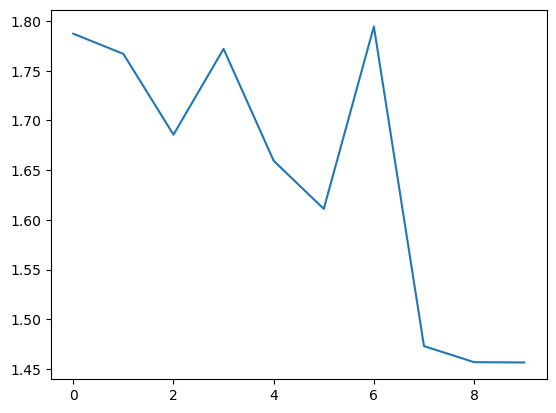

In [41]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 10)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [50]:
y_p_f_b[9]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       ...,
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [49]:
y_t_f_b[9]

array([[0.02175849, 0.02544853, 0.02061331, 0.02105866],
       [0.02086779, 0.02404886, 0.02201298, 0.02061331],
       [0.02519405, 0.02105866, 0.0247487 , 0.02086779],
       ...,
       [0.02633923, 0.02659371, 0.02150401, 0.02175849],
       [0.02175849, 0.02220384, 0.02175849, 0.02175849],
       [0.02061331, 0.02334903, 0.02379438, 0.02404886]])

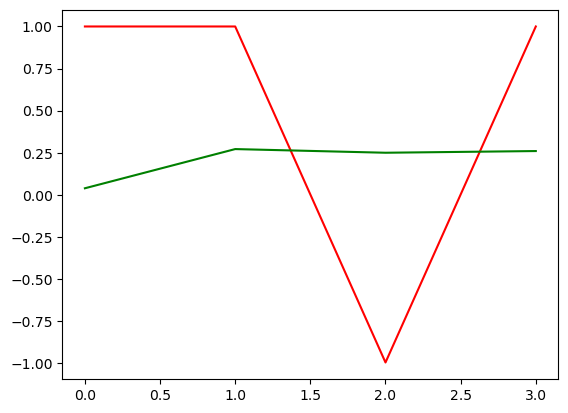

In [53]:
plt.plot(y_p_f_b[9][98], color='red')
plt.plot(y_t_f_b[9][98], color='green')

Epoch 0, epoch loss = 1.2655599665074773
Epoch 1, epoch loss = 0.8839246576743854
Epoch 2, epoch loss = 1.1674346210943987
Epoch 3, epoch loss = 1.435729981505756
Epoch 4, epoch loss = 1.4476916649589344
Epoch 5, epoch loss = 1.4555915449022325
Epoch 6, epoch loss = 1.465724057269539
Epoch 7, epoch loss = 1.4556437211705955
Epoch 8, epoch loss = 1.357663799163767
Epoch 9, epoch loss = 1.376284885340236
Epoch 10, epoch loss = 1.3259660777390343
Epoch 11, epoch loss = 1.174712421470517
Epoch 12, epoch loss = 1.1573035701028875
Epoch 13, epoch loss = 1.1540976957188047
Epoch 14, epoch loss = 1.1510442658974631
Epoch 15, epoch loss = 1.1502107149888967
Epoch 16, epoch loss = 1.152671768175045
Epoch 17, epoch loss = 1.1483796009619738
Epoch 18, epoch loss = 1.1474828810289908
Epoch 19, epoch loss = 1.1471742696551375
Epoch 20, epoch loss = 1.1474514758227308
Epoch 21, epoch loss = 1.1479046918536382
Epoch 22, epoch loss = 1.148426032676178
Epoch 23, epoch loss = 1.149263640734676
Epoch 24, 

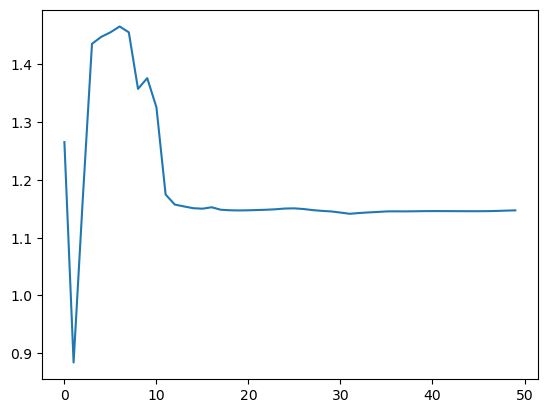

In [54]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 50)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [56]:
y_p_f_b[9]

array([[-0.99630947,  1.        ,  0.02590079,  0.9999785 ],
       [-0.99916422,  1.        ,  0.02040998,  0.99997963],
       [-0.9997988 ,  1.        ,  0.02097785,  0.99997956],
       ...,
       [-1.        ,  1.        ,  0.0242993 ,  0.99998771],
       [-1.        ,  1.        ,  0.02297364,  0.99998785],
       [-1.        ,  1.        ,  0.00651045,  0.99999004]])

In [57]:
y_t_f_b[9]

array([[0.02175849, 0.02544853, 0.02061331, 0.02105866],
       [0.02086779, 0.02404886, 0.02201298, 0.02061331],
       [0.02519405, 0.02105866, 0.0247487 , 0.02086779],
       ...,
       [0.02633923, 0.02659371, 0.02150401, 0.02175849],
       [0.02175849, 0.02220384, 0.02175849, 0.02175849],
       [0.02061331, 0.02334903, 0.02379438, 0.02404886]])

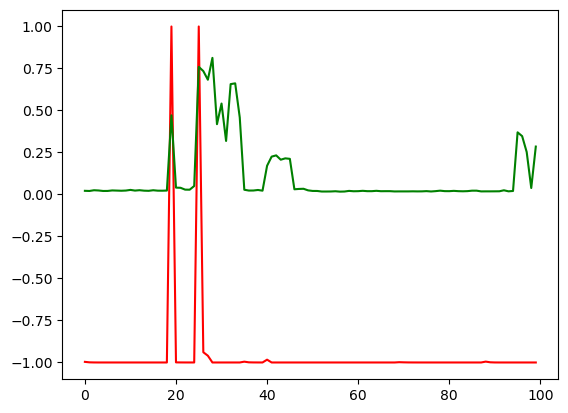

In [61]:
plt.plot(y_p_f_b[9][:, 0][:100], color='red')
plt.plot(y_t_f_b[9][:, 0][:100], color='green')

Epoch 0, epoch loss = 1.404120278484059
Epoch 1, epoch loss = 1.5375488362399399
Epoch 2, epoch loss = 1.655552269163336
Epoch 3, epoch loss = 1.8658089067035337
Epoch 4, epoch loss = 1.859042219114141
Epoch 5, epoch loss = 1.8337140385706614
Epoch 6, epoch loss = 1.8311993910195261
Epoch 7, epoch loss = 1.9069081328537059
Epoch 8, epoch loss = 1.8693136717789098
Epoch 9, epoch loss = 1.8567248846402067
Epoch 10, epoch loss = 1.9398431190298633
Epoch 11, epoch loss = 1.8730178439681484
Epoch 12, epoch loss = 1.8798469882018936
Epoch 13, epoch loss = 1.8710448815108454
Epoch 14, epoch loss = 1.8206769123196997
Epoch 15, epoch loss = 1.8206313817361186
Epoch 16, epoch loss = 1.8384730353230714
Epoch 17, epoch loss = 1.783542531355982
Epoch 18, epoch loss = 1.4970546502551019
Epoch 19, epoch loss = 1.4347991274243446
Epoch 20, epoch loss = 1.4273672693559774
Epoch 21, epoch loss = 1.4329182499481576
Epoch 22, epoch loss = 1.3847397244626065
Epoch 23, epoch loss = 1.504875104804728
Epoch 2

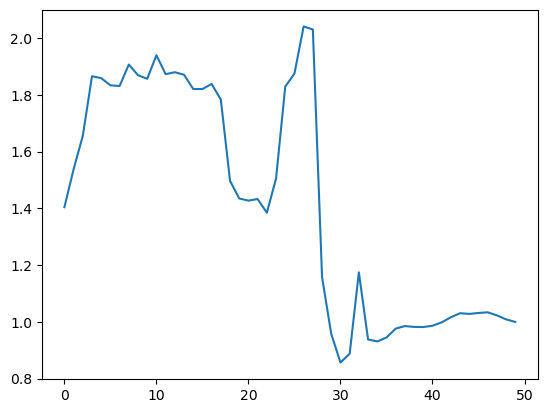

In [62]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.001)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 50)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [64]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.1)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 50)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 1.456504889050534
Epoch 1, epoch loss = 1.456504889050534
Epoch 2, epoch loss = 1.456504889050534
Epoch 3, epoch loss = 1.456504889050534
Epoch 4, epoch loss = 1.456504889050534
Epoch 5, epoch loss = 1.456504889050534
Epoch 6, epoch loss = 1.456504889050534


KeyboardInterrupt: 

In [65]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.37)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 50)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 1.456504889050681
Epoch 1, epoch loss = 1.456504889050681
Epoch 2, epoch loss = 1.456504889050681
Epoch 3, epoch loss = 1.456504889050681


KeyboardInterrupt: 

Epoch 0, epoch loss = 2.0908808186385257
Epoch 1, epoch loss = 1.7907498650538278
Epoch 2, epoch loss = 1.8016156067504223
Epoch 3, epoch loss = 1.8014331633986849
Epoch 4, epoch loss = 1.8018612653563335
Epoch 5, epoch loss = 1.8014431618639528
Epoch 6, epoch loss = 1.8017031668352181
Epoch 7, epoch loss = 1.8017727371319798
Epoch 8, epoch loss = 1.8018473846479297
Epoch 9, epoch loss = 1.801802611624849
Epoch 10, epoch loss = 1.8019138214573864
Epoch 11, epoch loss = 1.8021408559892338
Epoch 12, epoch loss = 1.8021408559892813
Epoch 13, epoch loss = 1.8021408559893288
Epoch 14, epoch loss = 1.8021408559893761
Epoch 15, epoch loss = 1.8021408559894236
Epoch 16, epoch loss = 1.8021408559894712
Epoch 17, epoch loss = 1.8021408559895187
Epoch 18, epoch loss = 1.8021408559895657
Epoch 19, epoch loss = 1.8021408559896133
Epoch 20, epoch loss = 1.8021408559896608
Epoch 21, epoch loss = 1.8021408559897079
Epoch 22, epoch loss = 1.802140855989755
Epoch 23, epoch loss = 1.8021408559898024
Epoc

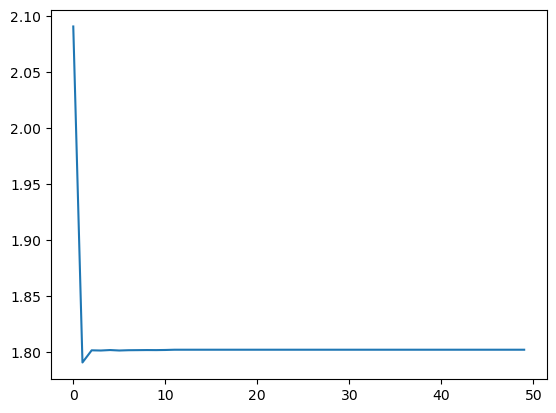

In [66]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.05)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 50)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

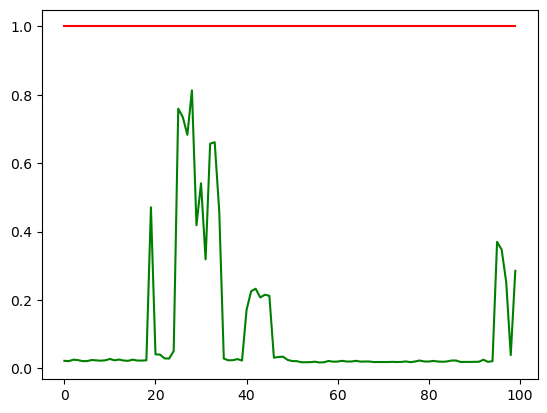

In [67]:
plt.plot(y_p_f_b[9][:, 0][:100], color='red')
plt.plot(y_t_f_b[9][:, 0][:100], color='green')

Epoch 0, epoch loss = 0.5830114379206779
Epoch 1, epoch loss = 0.5684633226481137
Epoch 2, epoch loss = 0.5663603618723313
Epoch 3, epoch loss = 0.5235951170147896
Epoch 4, epoch loss = 0.49424491475402205
Epoch 5, epoch loss = 0.46073753008593576
Epoch 6, epoch loss = 0.46992695293193654
Epoch 7, epoch loss = 0.48381906631992555
Epoch 8, epoch loss = 0.4570076943443361
Epoch 9, epoch loss = 0.4453371316825861
First epoch loss - 0.5830114379206779
Last epoch loss - 0.4453371316825861


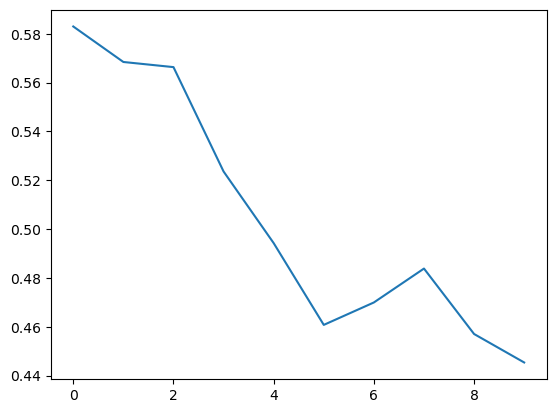

In [78]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 10)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

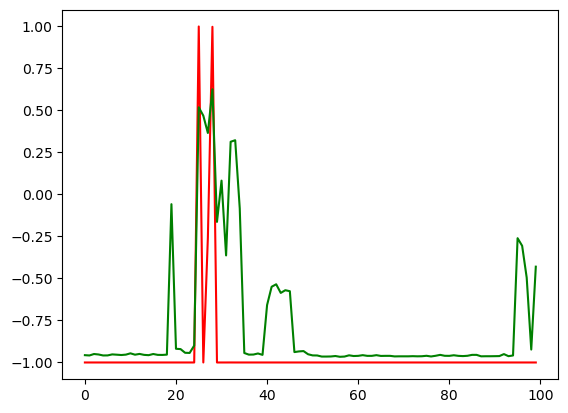

In [79]:
plt.plot(y_p_f_b[9][:, 0][:100], color='red')
plt.plot(y_t_f_b[9][:, 0][:100], color='green')

Epoch 0, epoch loss = 0.616853981812341
Epoch 1, epoch loss = 0.5836053876494257
Epoch 2, epoch loss = 0.46764776376095624
Epoch 3, epoch loss = 0.4463601593605158
Epoch 4, epoch loss = 0.466128413893776
Epoch 5, epoch loss = 0.4249720191615868
Epoch 6, epoch loss = 0.4131496738849698
Epoch 7, epoch loss = 0.40361401117282636
Epoch 8, epoch loss = 0.4366469612254969
Epoch 9, epoch loss = 0.4919890363482595
Epoch 10, epoch loss = 0.5626359687407002
Epoch 11, epoch loss = 0.5147917659461674
Epoch 12, epoch loss = 0.5381654795497031
Epoch 13, epoch loss = 0.568934008149726
Epoch 14, epoch loss = 0.5684842368740806
Epoch 15, epoch loss = 0.6208032890744107
Epoch 16, epoch loss = 0.5607936548625906
Epoch 17, epoch loss = 0.5534857788937827
Epoch 18, epoch loss = 0.5618550583824405
Epoch 19, epoch loss = 0.5619153684283679
Epoch 20, epoch loss = 0.5663781023633548
Epoch 21, epoch loss = 0.5663040058644496
Epoch 22, epoch loss = 0.566004230873706
Epoch 23, epoch loss = 0.5665764770903519
Epoc

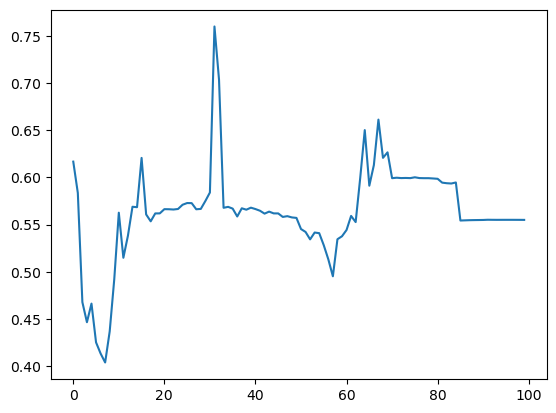

In [80]:
net_arch = (9, 100, 100, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 100)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

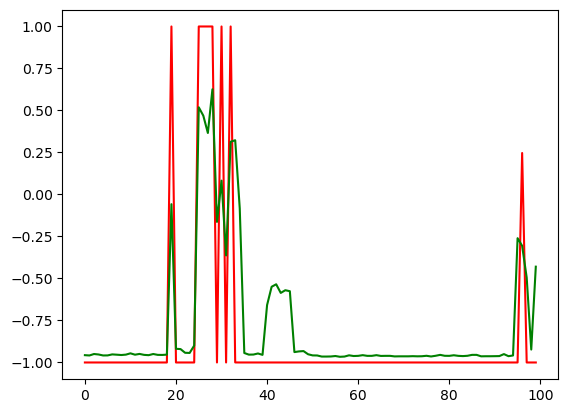

In [81]:
plt.plot(y_p_f_b[9][:, 0][:100], color='red')
plt.plot(y_t_f_b[9][:, 0][:100], color='green')

Epoch 0, epoch loss = 0.5830082543427494
Epoch 1, epoch loss = 0.5847328190845245
Epoch 2, epoch loss = 0.5846111489393091
Epoch 3, epoch loss = 0.6144766193537886
Epoch 4, epoch loss = 0.5827393408419619
Epoch 5, epoch loss = 0.5814182918008843
Epoch 6, epoch loss = 0.5841947026641591
Epoch 7, epoch loss = 0.5670540189624877
Epoch 8, epoch loss = 0.5443336640439674
Epoch 9, epoch loss = 0.549700741781134
Epoch 10, epoch loss = 0.5342520743684737
Epoch 11, epoch loss = 0.5221843340070293
Epoch 12, epoch loss = 0.4988888747501391
Epoch 13, epoch loss = 0.601747155202225
Epoch 14, epoch loss = 0.601731161679685
Epoch 15, epoch loss = 0.601729295975747
Epoch 16, epoch loss = 0.6017282400704793
Epoch 17, epoch loss = 0.6017273446932689
Epoch 18, epoch loss = 0.6017265075826416
Epoch 19, epoch loss = 0.6017257068132184
Epoch 20, epoch loss = 0.6017249370612766
Epoch 21, epoch loss = 0.6017241966734107
Epoch 22, epoch loss = 0.60172348459623
Epoch 23, epoch loss = 0.6017227996695436
Epoch 24

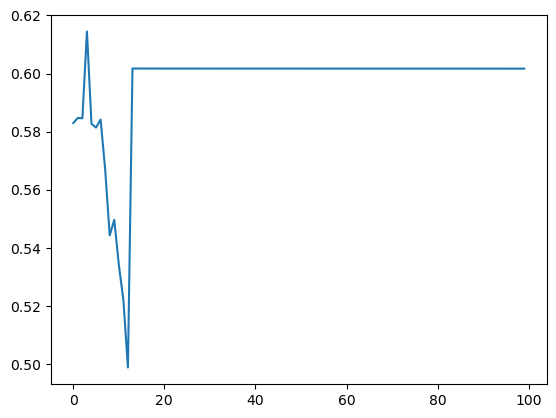

In [82]:
net_arch = (9, 200, 100, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), 100)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [ ]:
net_arch = (9, 150, 100, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.5)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 0.4713327091793206
Epoch 1, epoch loss = 0.5268105779421814
Epoch 2, epoch loss = 0.486499204422526
Epoch 3, epoch loss = 0.5418560192521882
Epoch 4, epoch loss = 0.32965679257443586
Epoch 5, epoch loss = 0.38277967123867335
Epoch 6, epoch loss = 0.45078442216270087
Epoch 7, epoch loss = 1.1597356213494872
Epoch 8, epoch loss = 0.462230376491417
Epoch 9, epoch loss = 0.4600694867617586
Epoch 10, epoch loss = 0.5411500593415643
Epoch 11, epoch loss = 0.5762432538850544
Epoch 12, epoch loss = 0.5928813667453012
Epoch 13, epoch loss = 0.5765477903097254
Epoch 14, epoch loss = 0.5686851137273164
Epoch 15, epoch loss = 0.5641477534702033
Epoch 16, epoch loss = 0.5589647522416844
Epoch 17, epoch loss = 0.5361726529538673
Epoch 18, epoch loss = 0.5203106019333222
Epoch 19, epoch loss = 0.5027148969916135
Epoch 20, epoch loss = 0.4928241192255079
Epoch 21, epoch loss = 0.555510854218199
Epoch 22, epoch loss = 0.5594378269383815
Epoch 23, epoch loss = 0.5617989561798487
Ep

Epoch 0, epoch loss = 1.7529781234637833
Epoch 1, epoch loss = 0.7314975052393934
Epoch 2, epoch loss = 0.5918917450680864
Epoch 3, epoch loss = 0.5589452159546414
Epoch 4, epoch loss = 0.5483196671064602
Epoch 5, epoch loss = 0.5530174360025972
Epoch 6, epoch loss = 0.5397900964976529
Epoch 7, epoch loss = 0.5383263744029941
Epoch 8, epoch loss = 0.5287598250422497
Epoch 9, epoch loss = 0.5301293336480155
Epoch 10, epoch loss = 0.5316298343723609
Epoch 11, epoch loss = 0.5299263990947832
Epoch 12, epoch loss = 0.5334221347585991
Epoch 13, epoch loss = 0.5295316395395129
Epoch 14, epoch loss = 0.5248770547228586
Epoch 15, epoch loss = 0.5238298501406257
Epoch 16, epoch loss = 0.524123019648997
Epoch 17, epoch loss = 0.5365243811954208
Epoch 18, epoch loss = 0.5302916188688093
Epoch 19, epoch loss = 0.544091159563264
Epoch 20, epoch loss = 0.5220501739657977
Epoch 21, epoch loss = 0.5311831437887765
Epoch 22, epoch loss = 0.5342163871197387
Epoch 23, epoch loss = 0.5237169829246797
Epoc

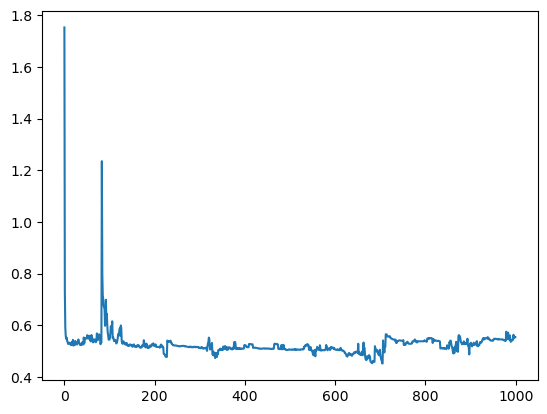

In [23]:
net_arch = (9, 50, 50, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.4)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

Epoch 0, epoch loss = 2.4455550945031157
Epoch 1, epoch loss = 2.39491629702947
Epoch 2, epoch loss = 2.247973883376523
Epoch 3, epoch loss = 2.3934005642304013
Epoch 4, epoch loss = 2.2490746864317264
Epoch 5, epoch loss = 2.101268068309451
Epoch 6, epoch loss = 0.8384801436344462
Epoch 7, epoch loss = 0.5968320903096564
Epoch 8, epoch loss = 0.604598965672543
Epoch 9, epoch loss = 0.5903603419281387
Epoch 10, epoch loss = 0.5935723032680166
Epoch 11, epoch loss = 0.596737960571106
Epoch 12, epoch loss = 0.5868247375786119
Epoch 13, epoch loss = 0.584795168086021
Epoch 14, epoch loss = 0.5864395918929273
Epoch 15, epoch loss = 0.5820137645590717
Epoch 16, epoch loss = 0.5742488218747686
Epoch 17, epoch loss = 0.5625092951399532
Epoch 18, epoch loss = 0.5614756394905839
Epoch 19, epoch loss = 0.5788214406119697
Epoch 20, epoch loss = 0.556451067106347
Epoch 21, epoch loss = 0.5490095227917469
Epoch 22, epoch loss = 0.5448717662566824
Epoch 23, epoch loss = 0.5765648156777013
Epoch 24, 

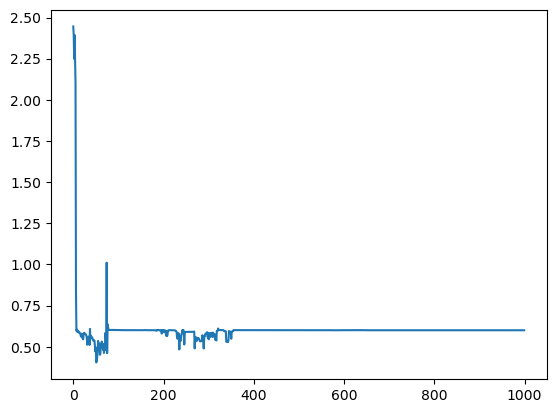

In [27]:
net_arch = (9, 100, 50, 1)
nn = RMLP(net_arch, 4, 0.01)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss= 0.4)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

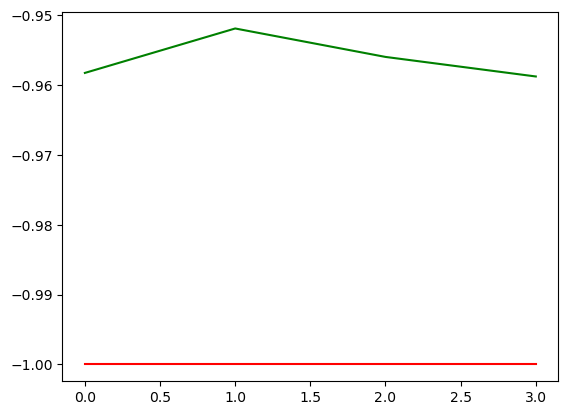

In [33]:
plt.plot(y_p_f_b[9][1], color='red')
plt.plot(y_t_f_b[9][1], color='green')

Epoch 0, epoch loss = 0.6012874723667557
Epoch 1, epoch loss = 0.6005259288071249
Epoch 2, epoch loss = 0.5987674396697213
Epoch 3, epoch loss = 0.6842177171082621
Epoch 4, epoch loss = 0.5791754382864462
Epoch 5, epoch loss = 3.687735020108289
Epoch 6, epoch loss = 0.7362940020361814
Epoch 7, epoch loss = 0.7008161778652642
Epoch 8, epoch loss = 0.6592066378591775
Epoch 9, epoch loss = 0.6547208381505786
Epoch 10, epoch loss = 0.5564266911569471
Epoch 11, epoch loss = 0.5269990671856899
Epoch 12, epoch loss = 0.5237123034975351
Epoch 13, epoch loss = 0.5344174418270811
Epoch 14, epoch loss = 0.53122255071103
Epoch 15, epoch loss = 0.5311556212671706
Epoch 16, epoch loss = 0.5398786246879081
Epoch 17, epoch loss = 0.5481865631478775
Epoch 18, epoch loss = 0.5296745065792872
Epoch 19, epoch loss = 0.5362977370304798
Epoch 20, epoch loss = 0.5332191142852252
Epoch 21, epoch loss = 0.5300087728514457
Epoch 22, epoch loss = 0.5296237119874166
Epoch 23, epoch loss = 0.5262097591607486
Epoch

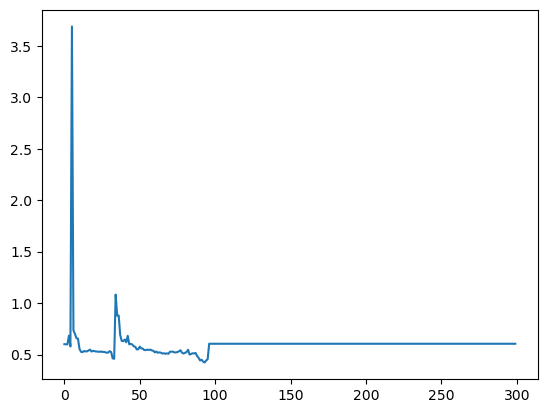

In [15]:
net_arch = (9, 50, 1)
nn = RMLP(net_arch, 4, 0.1)
# nn._init_weights(net_arch)
epoch_losses, y_p, y_t, y_p_f_b, y_t_f_b = nn.train(pd.DataFrame(X_train), pd.DataFrame(y_train), min_loss=0.01, max_epochs=300)
# nn.feedforward(X_train.iloc[0].values)
# nn._backprop(pd.DataFrame(y_train_two_outs).iloc[0].values)
plt.plot(epoch_losses)
print(f"First epoch loss - {epoch_losses[0]}\nLast epoch loss - {epoch_losses[-1]}")

In [33]:
n = len(y_test)

observations = np.array(pd.DataFrame(y_test))  # фактические наблюдения
predictions = np.array(nn.predict(pd.DataFrame(X_test))) # предсказания (результат применения модели)

observations = observations.reshape(observations.shape[0])
mse_result = mse(predictions, observations, batch_size=4)
rmse_result = np.sqrt(mse_result)
r2_result = r2(predictions, observations, batch_size=4)
print(f'MSE: {mse_result}')
print(f'RMSE: {rmse_result}')
print(f'R^2: {r2_result}')



MSE: 0.6309945831209957
RMSE: 0.7943516747140372
R^2: 0.49574441220593013
